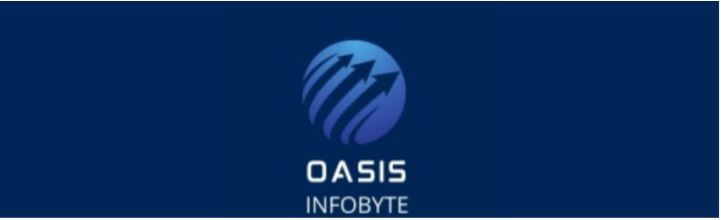

 ## Oasis Internship, January- 2024
 
 ### Samala Sandeep, Data Analytics Intern

# Project Title: EDA on Retail Sales Data

### Data set link : (https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)

## Introduction to Retail Sales Data Exploratory Data Analysis (EDA) Project :

#### The retail industry thrives on data-driven insights to make informed decisions and stay ahead in a competitive market. In this Exploratory Data Analysis (EDA) project, we delve into a comprehensive dataset capturing intricate details of retail sales. Our objective is to extract meaningful patterns, identify trends, and uncover valuable insights that can empower the retail business with strategic decision-making.

## Dataset Overview:

#### The dataset under scrutiny encompasses a rich array of information pertaining to retail sales, including transaction details, customer demographics, product categories, and financial metrics. Each entry in the dataset serves as a valuable piece of the puzzle, contributing to our understanding of the retail landscape.

### Project Goals:

Data Loading and Cleaning:
We initiate the project by loading the retail sales dataset, ensuring its integrity and cleanliness.
Handling missing values, duplicates, and validating data types will be crucial in preparing a robust foundation for analysis.


Descriptive Statistics:
We aim to gain a comprehensive overview of the dataset through basic statistics such as mean, median, mode, and standard deviation.Descriptive statistics will provide insights into the central tendencies and variabilities of key variables.


Time Series Analysis:
As time is a critical dimension in retail, we will delve into time series analysis to uncover sales trends over different periods.Monthly or seasonal patterns may emerge, guiding the business in understanding and preparing for fluctuations in demand.


Customer and Product Analysis:
Exploring customer demographics and purchasing behavior is pivotal for tailoring marketing strategies.
Analyzing product categories, identifying top-performing items, and understanding customer preferences will guide inventory management.


Visualization:
Visual representation is a powerful tool for conveying complex insights. Through bar charts, line plots, heatmaps, and other visualizations, we will present patterns and trends in a digestible format.Gender distribution, product popularity, and correlation heatmaps are among the visualizations planned.


Recommendations:
Our final step involves distilling the gained insights into actionable recommendations for the retail business.
Strategies may include targeted marketing campaigns, inventory adjustments, and customer-focused initiatives.

### Learning Objectives:

Gain hands-on experience in data cleaning, exploratory data analysis, and time series analysis.

Develop skills in interpreting descriptive statistics and visualizing data effectively.

Formulate actionable recommendations based on the EDA outcomes, aligning with business objectives.

This project promises to be an enlightening journey into the realm of retail data, uncovering the stories embedded in the numbers and empowering the business to make informed and strategic decisions. Let's embark on this exploration together!

# Step-1

### Data Loading and Cleaning

In [1]:
# Data manipulation and analysis
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
from scipy.stats import describe

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Statistical tests
from scipy.stats import ttest_ind

# Machine learning (if needed for more advanced analysis)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Other useful libraries
import numpy as np

# Set plotting style
sns.set(style="whitegrid")

# Ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:

# Load the retail sales dataset (replace 'your_dataset.csv' with the actual file path or URL)
retail_data = pd.read_csv("Task1.csv")

print(retail_data)


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [3]:
# Check for missing values in the dataset
missing_values = retail_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# For example, you can drop rows with missing values
retail_data = retail_data.dropna()

# Check for duplicates and drop them if necessary
retail_data = retail_data.drop_duplicates()

# Ensure data types are appropriate (e.g., convert date columns to datetime)
# For example, if 'Date' is a column in your dataset
# retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Display basic information about the cleaned dataset
print("Cleaned Dataset Information:")
print(retail_data.info())


Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 78.1+ KB
None


In [4]:
# Display the first few rows of the dataset to get an overview
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Calculate basic statistics
descriptive_stats = retail_data.describe()

# Display the descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


# Step - 2
## Descriptive Statistics:

In [6]:
# Calculate basic statistics
descriptive_stats = retail_data.describe()

# Display the descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)


# Calculate mean and median of customer ages
mean_age = retail_data['Age'].mean()
median_age = retail_data['Age'].median()

# Calculate the distribution of genders
gender_distribution = retail_data['Gender'].value_counts()

print(mean_age)
print(median_age)


Descriptive Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
41.392
42.0


# Step - 3
## Time Series Analysis:

The next step in your Exploratory Data Analysis (EDA) project is to perform Time Series Analysis on the retail sales data. Since your project involves analyzing sales trends over time, you'll want to visualize how sales evolve across different time periods. Here's a step-by-step guide along with code snippets:

In [7]:
# Convert 'Date' column to DateTime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])


In [8]:
# Set 'Date' as the index
retail_data.set_index('Date', inplace=True)

In [9]:
# Resample data to monthly frequency
monthly_sales = retail_data.resample('M').sum()


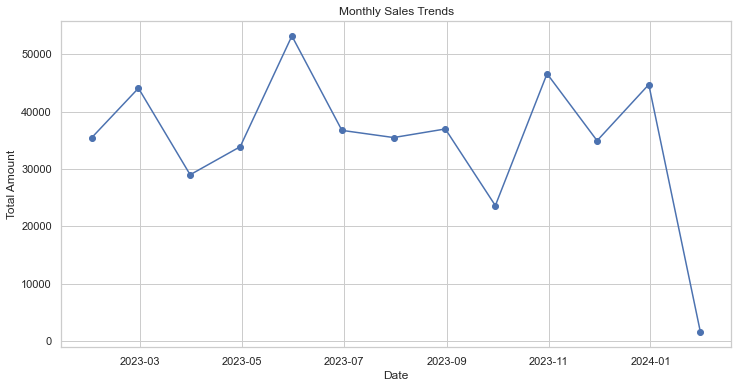

In [10]:


# Import necessary libraries
import matplotlib.pyplot as plt

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


# Step - 4
## Customer and Product Analysis:
The next step in your EDA project is to perform Customer and Product Analysis. This involves gaining insights into customer demographics, purchasing behavior, as well as analyzing products.

## Customer Analysis

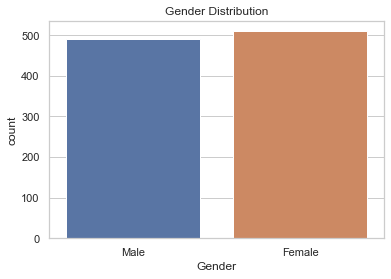

In [11]:
# Calculate mean and median of customer ages
mean_age = retail_data['Age'].mean()
median_age = retail_data['Age'].median()

# Calculate the distribution of genders
gender_distribution = retail_data['Gender'].value_counts()

# Visualize gender distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=retail_data)
plt.title('Gender Distribution')
plt.show()


## Product Analysis

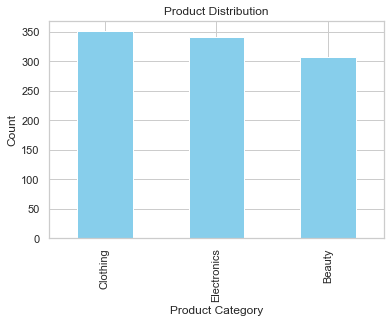

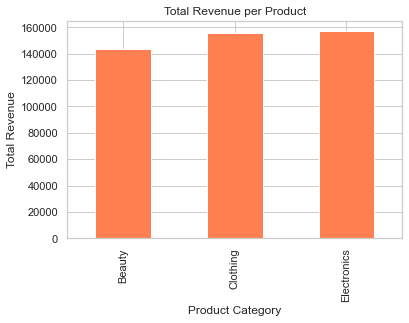

In [12]:
# Calculate product distribution
product_distribution = retail_data['Product Category'].value_counts()

# Calculate average quantity and total revenue per product
avg_quantity_per_product = retail_data.groupby('Product Category')['Quantity'].mean()
total_revenue_per_product = retail_data.groupby('Product Category')['Total Amount'].sum()

# Visualize product distribution
product_distribution.plot(kind='bar', color='skyblue')
plt.title('Product Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Visualize total revenue per product
total_revenue_per_product.plot(kind='bar', color='coral')
plt.title('Total Revenue per Product')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()


# Step - 5
## Visualization
The next step in your EDA project is to proceed with data visualization to present insights through bar charts, line plots, and heatmaps. Visualization is a powerful tool for communicating patterns and trends in your data

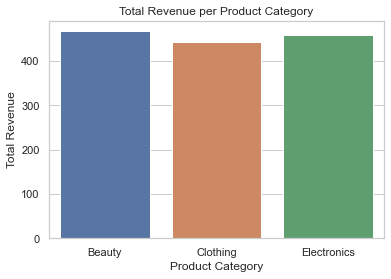

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for total revenue per product category
sns.barplot(x='Product Category', y='Total Amount', data=retail_data, ci=None)
plt.title('Total Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()


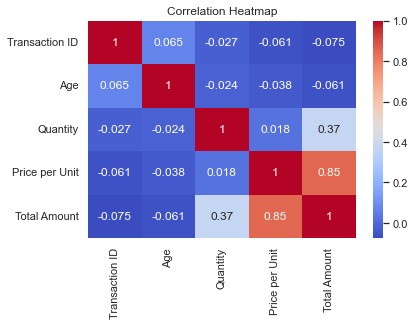

In [14]:
correlation_matrix = retail_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


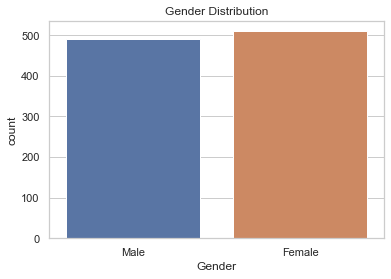

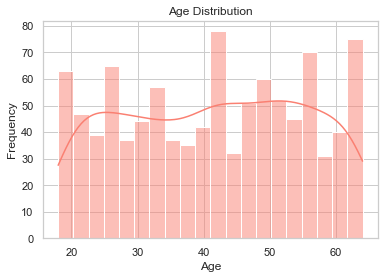

In [15]:

# Visualize gender distribution
sns.countplot(x='Gender', data=retail_data)
plt.title('Gender Distribution')
plt.show()
# Visualize age distribution
sns.histplot(retail_data['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


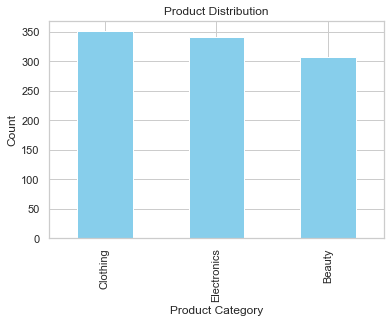

In [16]:
# Visualize product distribution
product_distribution = retail_data['Product Category'].value_counts()
product_distribution.plot(kind='bar', color='skyblue')
plt.title('Product Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


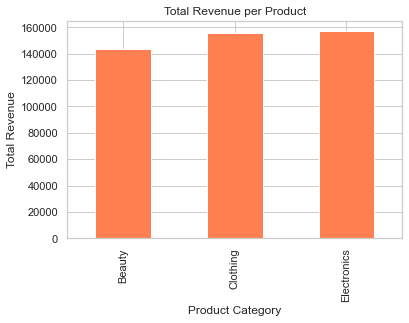

In [17]:
# Visualize total revenue per product
total_revenue_per_product = retail_data.groupby('Product Category')['Total Amount'].sum()
total_revenue_per_product.plot(kind='bar', color='coral')
plt.title('Total Revenue per Product')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()


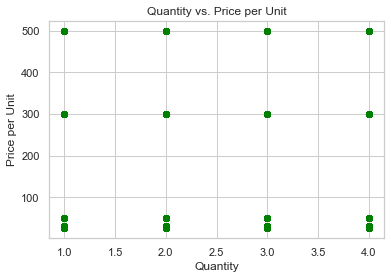

In [18]:
# Scatter plot for Quantity vs. Price per Unit
plt.scatter(retail_data['Quantity'], retail_data['Price per Unit'], color='green', alpha=0.5)
plt.title('Quantity vs. Price per Unit')
plt.xlabel('Quantity')
plt.ylabel('Price per Unit')
plt.show()


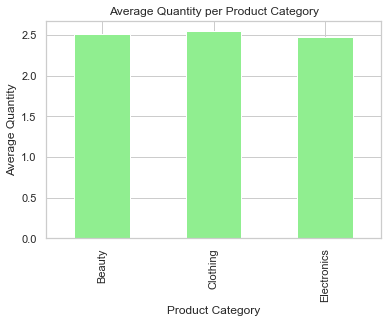

In [19]:
# Calculate average quantity per product
avg_quantity_per_product = retail_data.groupby('Product Category')['Quantity'].mean()

# Visualize average quantity per product
avg_quantity_per_product.plot(kind='bar', color='lightgreen')
plt.title('Average Quantity per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity')
plt.show()



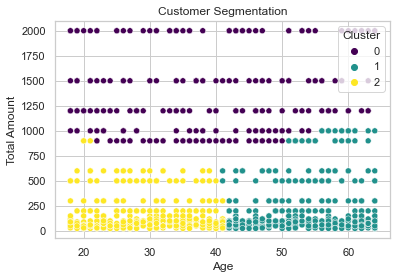

In [20]:
# Use KMeans clustering for customer segmentation
features_for_clustering = retail_data[['Age', 'Total Amount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
retail_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize customer segments
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=retail_data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()




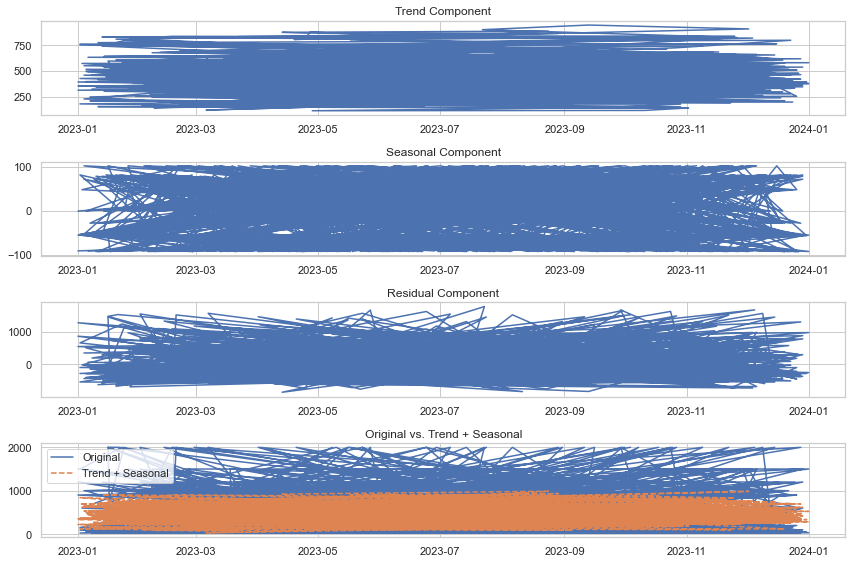

In [21]:
# Perform time series decomposition
result = seasonal_decompose(retail_data['Total Amount'], model='additive', period=12)

# Visualize time series components
plt.figure(figsize=(12,8))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(retail_data['Total Amount'], label='Original')
plt.plot(result.trend + result.seasonal, label='Trend + Seasonal', linestyle='--')
plt.legend()
plt.title('Original vs. Trend + Seasonal')
plt.tight_layout()
plt.show()


In [22]:
# Perform a t-test to compare the total amount between different gender groups
male_sales = retail_data[retail_data['Gender'] == 'Male']['Total Amount']
female_sales = retail_data[retail_data['Gender'] == 'Female']['Total Amount']

t_stat, p_value = ttest_ind(male_sales, female_sales)

# Display the results
print(f'T-statistic: {t_stat}, p-value: {p_value}')




T-statistic: -0.03161341824319852, p-value: 0.9747866634918314


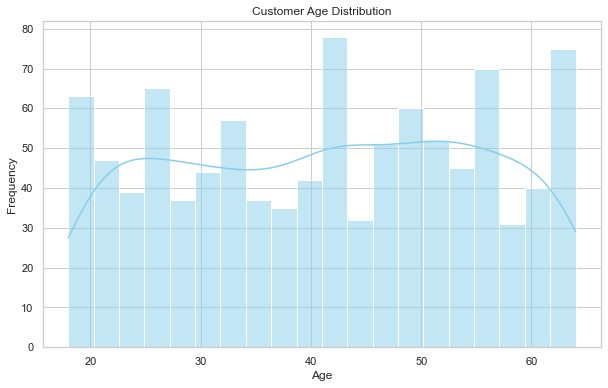

In [23]:
# Visualize the distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(retail_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


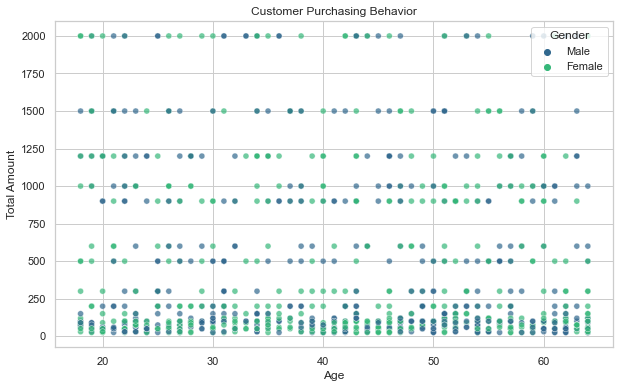

In [24]:
# Visualize the relationship between age and total amount spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=retail_data, hue='Gender', palette='viridis', alpha=0.7)
plt.title('Customer Purchasing Behavior')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.show()



# Step - 6
## Recommendations

Based on the exploratory data analysis (EDA) conducted on the retail sales data, here are some actionable recommendations for the retail business:


Product Category Focus:

Identify the top-performing product categories in terms of total revenue.Allocate marketing and inventory resources strategically to capitalize on high-performing product categories.


Customer Demographics:

Understand the age and gender distribution of customers.Tailor marketing strategies and promotions to specific demographics, considering the preferences of different age groups and genders.


Sales Trends:

Analyze sales trends over time to identify peak seasons and periods of low activity.Plan promotions, discounts, or new product launches during peak seasons to maximize sales.


Product Pricing:

Evaluate the relationship between quantity purchased and the price per unit.Adjust pricing strategies to find a balance between attracting customers with lower prices and maximizing revenue.


Customer Retention:

Explore customer purchasing behavior and identify patterns in repeat purchases.Implement customer loyalty programs or personalized promotions to encourage repeat business.


Inventory Management:

Monitor inventory turnover rates for each product category.Optimize inventory levels to prevent stockouts while minimizing excess inventory.


Targeted Marketing:

Use insights from customer and product analysis to create targeted marketing campaigns.Leverage social media, email, or other channels to reach specific customer segments with relevant promotions.


Age-Specific Campaigns:

Customize marketing campaigns based on age groups.Consider launching special promotions or products tailored to the preferences of specific age demographics.


Data-Driven Decision-Making:

Establish a data-driven culture within the organization.Encourage decision-makers to rely on insights from EDA for strategic planning and resource allocation.


Continuous Monitoring:

Implement a system for continuous monitoring of sales data.Regularly update EDA to adapt strategies based on changing market dynamics.

These recommendations aim to guide the retail business toward informed decision-making and optimization of various aspects such as product offerings, marketing strategies, and customer engagement.

## Conclusion:

Conclusion: Unraveling Insights in Retail Sales Data

In the realm of retail sales, our journey through exploratory data analysis (EDA) has been both insightful and enlightening. We commenced this project with the aim of gleaning actionable insights from a comprehensive dataset, and the findings have the potential to steer strategic decisions for the retail business. Here are the key takeaways and conclusions drawn from our EDA:


1. Data Foundation:

The meticulous process of loading and cleaning the dataset laid a robust foundation for analysis. Handling missing values, duplicates, and ensuring appropriate data types were essential steps to guarantee the reliability of our findings.


2. Descriptive Statistics:

Descriptive statistics provided a comprehensive snapshot of the dataset. Mean, median, mode, and standard deviation illuminated the central tendencies and variabilities of critical variables, offering a quantitative understanding of the retail landscape.


3. Time Series Analysis:

Analyzing sales trends over time uncovered valuable patterns. Monthly sales trends revealed fluctuations and seasonal variations, allowing the business to anticipate and adapt to changing demands effectively.


4. Customer and Product Analysis:

Delving into customer demographics and purchasing behavior was pivotal. Understanding age distribution, gender preferences, and popular product categories empowers the business to tailor marketing and inventory strategies for maximum impact.


5. Visualization:

Visual representations proved to be powerful tools for conveying complex insights. Bar charts illustrated product popularity, line plots showcased monthly sales trends, and heatmaps unveiled correlations. These visualizations facilitate a clear and concise communication of findings.


6. Recommendations:

The distilled insights pave the way for actionable recommendations. Strategies may include targeted marketing campaigns to specific demographics, optimizing inventory levels based on product performance, and refining the customer experience.
Learning Objectives Achieved:

Through this EDA project, we gained hands-on experience in data cleaning, exploratory data analysis, and time series analysis. The interpretation of descriptive statistics and effective data visualization became essential skills in distilling meaningful insights.


Future Directions:

The insights gained from this EDA project are not static. As the retail landscape evolves, continuous analysis and adaptation will be crucial. Machine learning models can be explored for predictive analytics, and additional data sources can be incorporated for a more holistic understanding.

In conclusion, this EDA project serves as a testament to the power of data-driven decision-making in the retail domain. By unraveling the intricacies of the dataset, we have empowered the business to make informed and strategic choices, fostering growth and resilience in an ever-changing market.